# 3. Análise Exploratória dos Dados

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv('../datasets/nosso-dataset/dados_tratados.csv')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_lng,seller_lat,seller_lng,distancia_vendedor_cliente_km,flag_mesmo_estado,flag_mesma_cidade,delivery_time,customer_state_encoded,seller_state_encoded,product_category_name_encoded
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,-46.587161,-23.680729,-46.444238,18.566632,1,0,8,25,21,72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,-44.660711,-19.807681,-43.980427,847.437333,0,0,13,4,21,62
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,-48.514783,-21.363502,-48.229601,512.100044,0,0,9,8,21,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,-35.271143,-19.837682,-43.924053,1816.085655,0,0,13,19,7,63
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,-46.514627,-23.543395,-46.262086,29.684401,1,0,2,25,21,59


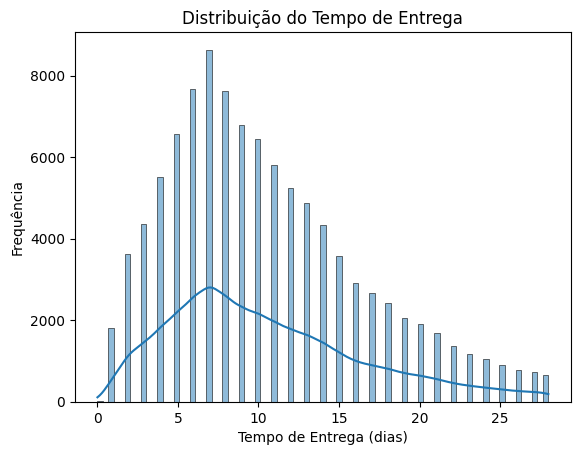

In [9]:
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.show()

In [10]:
df['delivery_time'].describe()

count    103162.000000
mean         10.516537
std           6.041027
min           0.000000
25%           6.000000
50%           9.000000
75%          14.000000
max          28.000000
Name: delivery_time, dtype: float64

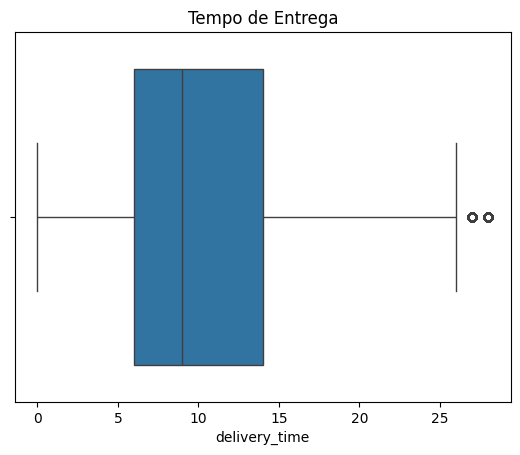

In [11]:
# outliers
sns.boxplot(x=df['delivery_time'])
plt.title('Tempo de Entrega')
plt.show()

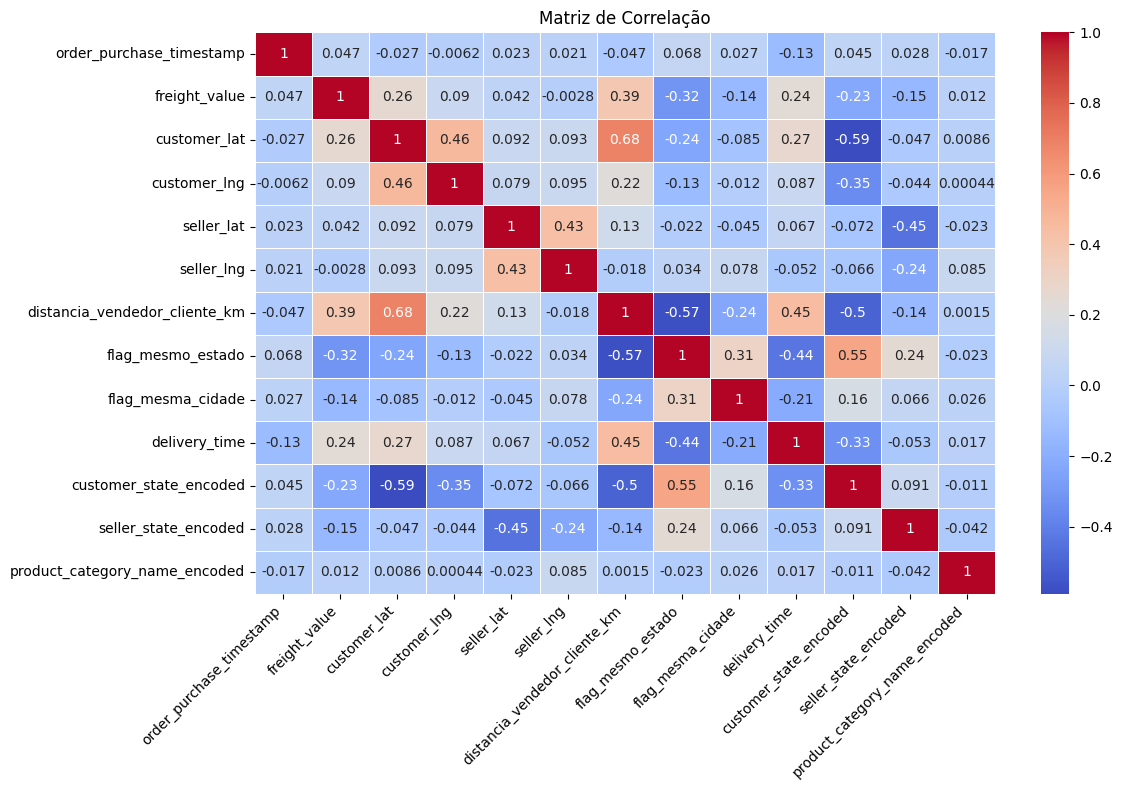

In [12]:
correlation_matrix = (
    df
    .select_dtypes(include=['number', 'datetime'])
    .corr()
    .drop(['seller_zip_code_prefix', 'customer_zip_code_prefix', 'order_item_id',
           'price', 'product_name_lenght', 'product_description_lenght',
           'product_photos_qty', 'product_weight_g', 'product_length_cm',
           'product_width_cm', 'product_height_cm'], axis=0)
           
    .drop(['seller_zip_code_prefix', 'customer_zip_code_prefix', 'order_item_id',
           'price', 'product_name_lenght', 'product_description_lenght',
           'product_photos_qty', 'product_weight_g', 'product_length_cm',
           'product_width_cm', 'product_height_cm'], axis=1)
    )

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()